## MSIS 2631 Machine Learning Project - Predicting Employee Attrition
#### Team: Neha Pawar, Sneha Krishnan, Tanushree Chaudhary

#### Data Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

People are companies’ most important assets. The rise of technology and the information age has resulted in more companies that compete based primarily on their people. The Fortune article on 'What Employers Will Worry About in 2017' states that: "The biggest priority, and concern, for business leaders in 2017 will be retaining employees in a competitive talent marketplace. In a new study by Future Workplace and Kronos, it was found that 87% of employers said that improving retention is a critical priority for their organization. In addition, the U.S. unemployment rate has been reduced to 4.6% and employee salaries are projected to grow by 3% in 2017, according to WorldatWork". As the economy continues to improve and employees have more job options, companies will have to provide additional compensation, expand benefits, and improve their employee experience. It is important to retain valuable employees as there are multiple costs associated with new hires which include onboarding, training, employee engagement, employee management etc. before companies get returns from an employee

So, if companies are able to predict attrition and identify factors that lead to attrition, they can implement management models that could attempt to solve these issues. In this project we use the dataset of a well known technology company, IBM which employes hundreds of thousands of employees across the globe. We investigate to see what factors lead to employees leaving IBM and how can it improve this situation. Other companies can use similar approach in identifying issues within and outside the company that costs them their valuable employees

References:
https://www.huffingtonpost.com/entry/how-much-does-employee-turnover-really-cost_us_587fbaf9e4b0474ad4874fb7
http://fortune.com/2016/12/28/employers-2017-employee-retention-unemployment/

In [1]:
# all necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=2) # print numpy arrays with precision 2
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import itertools
from ggplot import *

In [2]:
# imports for classification models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# imports for classification model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation, metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from scipy import stats
# imports for oversampling with SMOTE
from sklearn.cross_validation import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



### Step 1: Reading the data from file and Data Preparation

In [3]:
# Reading the data from file
attrition_data_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition_data_df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [4]:
# checking for null values in the dataframe
attrition_data_df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
# there are no null values so we do not need to drop any null rows
# analyzing some columns which may not be useful for our analysis
# 1. Employee number seems to represent a unique identifier for the employee we can drop this as it is not relevant for our purpose
attrition_data_df.drop('EmployeeNumber', axis =1, inplace= True)

In [6]:
# 2. Let us examine the column Over18 which indicates if the employee is over 18 years of age. 
attrition_data_df.Over18.unique()

array(['Y'], dtype=object)

In [7]:
# we can see that for the dataset all employees are adults. So we may remove this column as there is no variance in it
attrition_data_df.drop('Over18',axis =1, inplace=True)

In [8]:
# 3. Let us examine column EmployeeCount to see the unique values of this column
attrition_data_df.EmployeeCount.unique()

array([1])

In [9]:
# we can see that this column has value = 1 for all rows so we can drop this from the dataset as well
attrition_data_df.drop('EmployeeCount',axis =1, inplace=True)

In [10]:
# 4. Let us examine the column StandardHours for the unique values of the column
attrition_data_df.StandardHours.unique()

array([80])

In [11]:
# as we have the same value of 80 for StandardHours throughout the dataset we can remove this column from our dataset as well
attrition_data_df.drop('StandardHours',axis =1, inplace=True)

In [12]:
num_cols = attrition_data_df._get_numeric_data().columns

In [13]:
print('The numeric columns in the dataset are: ' + ', '.join(num_cols))

The numeric columns in the dataset are: Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager


In [14]:
cat_cols = attrition_data_df.drop(num_cols,axis =1).columns
print('The categorical columns in the dataset are: ' + ', '.join(cat_cols))

The categorical columns in the dataset are: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime


### Step 2. Exploratory Data Analysis

#### 2.1 Correlation Matrix and Scatter Plot

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


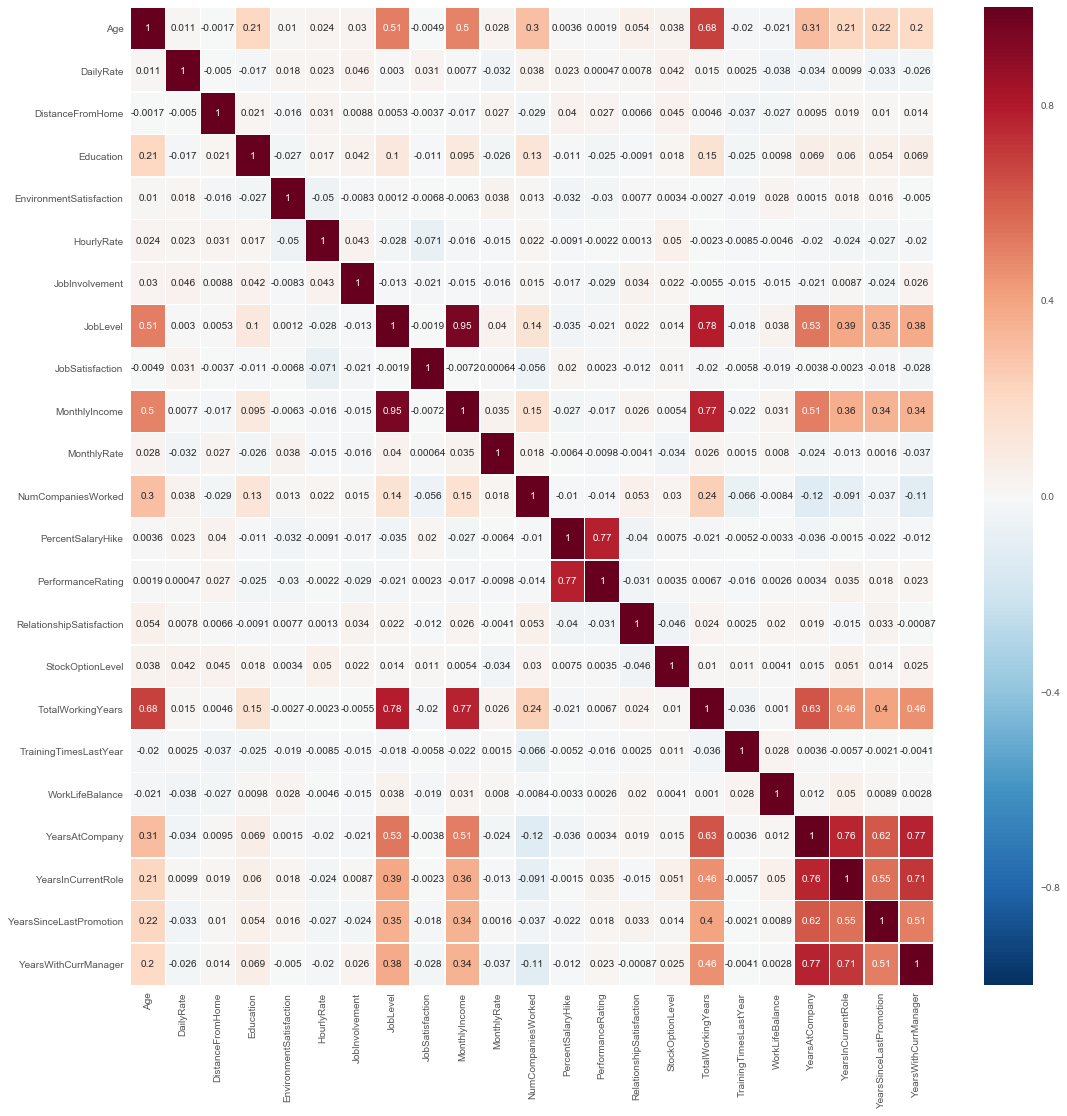

In [15]:
num_corr = attrition_data_df._get_numeric_data().corr()
num_corr = (num_corr)
fig, ax = plt.subplots(figsize=(18,18))         

sns.heatmap(num_corr, 
            xticklabels=num_corr.columns.values,
            yticklabels=num_corr.columns.values,annot = True, linewidths=.5, ax=ax)

num_corr

##### Insights from correlation matrix: 
There is high correlation between some predictors like :
1. Age and TotalWorkingYears
2. TotalWorkingYears with MonthlyIncome
3. YearsWithCurrManager also correlated with YearsAtCompany
4. YearsWithCurrManger correlated with YearsInCurrentRole
5. YearsInCurrentRole correlated with YearsAtCompany. 
6. YearsAtCompany coorelated with YearsSinceLastPromotion
But most of the variables have low collinearity with each other

#### 2.2 Categorical variables and attrition

In [16]:
attrition_data_df['attrition'] = attrition_data_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
attrition_data_df.drop('Attrition',axis = 1, inplace = True)

In [17]:
total = float(len(attrition_data_df)) 
sns.set(style= 'darkgrid')

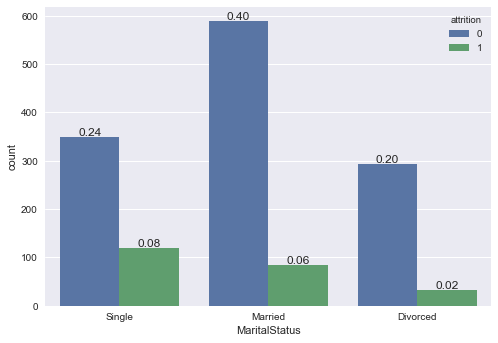

In [18]:
# Marital Status and attrition
ax = sns.countplot(x="MaritalStatus", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

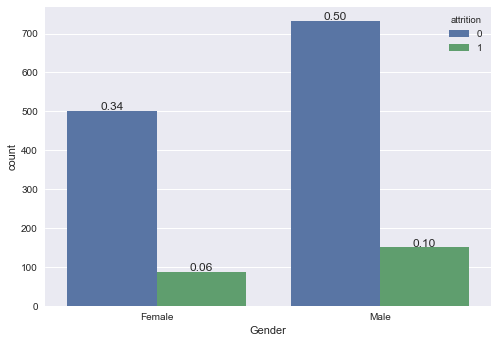

In [19]:
# Gender and attrition
ax = sns.countplot(x="Gender", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

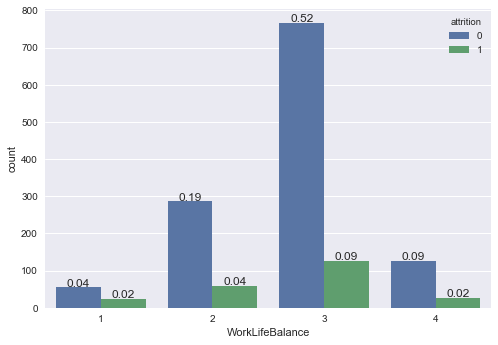

In [20]:
# WorkLifeBalance and attrition
ax = sns.countplot(x="WorkLifeBalance", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

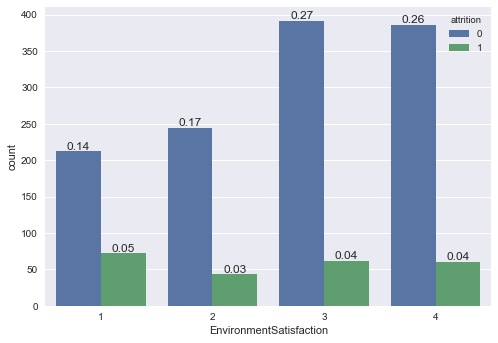

In [21]:
# EnvironmentSatisfaction and attrition
ax = sns.countplot(x="EnvironmentSatisfaction", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

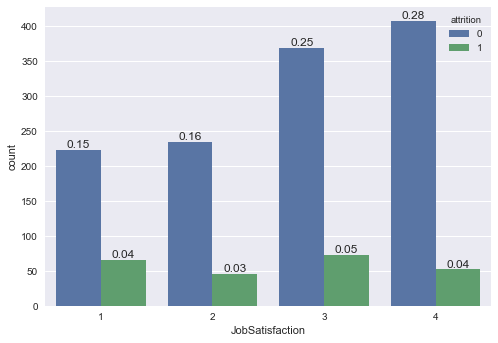

In [22]:
# JobSatisfaction and attrition
ax = sns.countplot(x="JobSatisfaction", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

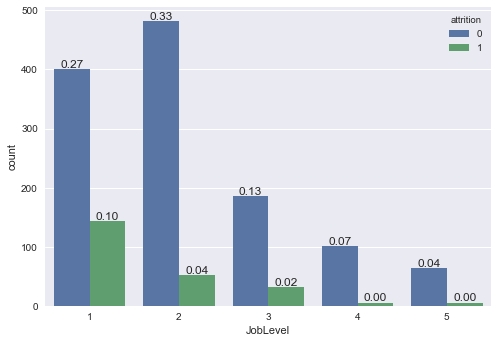

In [23]:
# JobLevel and attrition
ax = sns.countplot(x="JobLevel", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

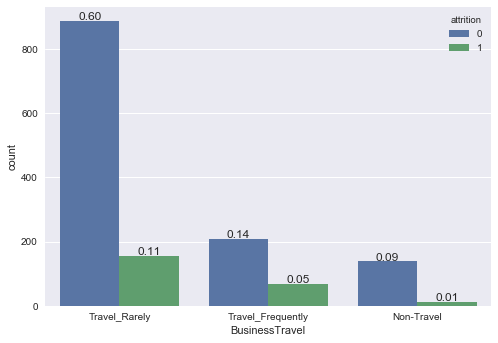

In [24]:
# BusinessTravel and attrition
ax = sns.countplot(x="BusinessTravel", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

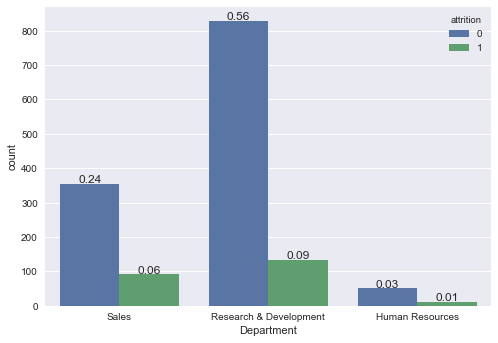

In [25]:
# Department and attrition
ax = sns.countplot(x="Department", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

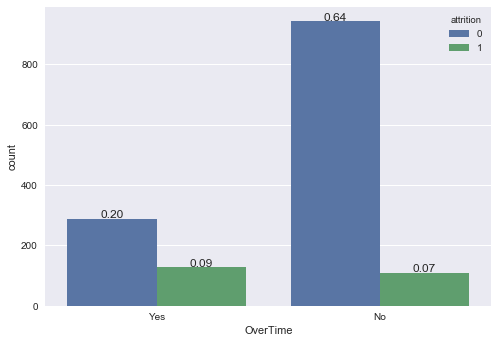

In [26]:
# OverTime and attrition
ax = sns.countplot(x="OverTime", hue="attrition", data=attrition_data_df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

##### Observations from the categorical variables and attrition are:
1. Single employees more leave the company
2. Male employees leave the company more than female employees
3. Assuming job levels 1 to 5 indicates growing levels of senior position, junior and other lower level employees leave the company more than senior levels
4. More attrition in Research & Development compared to other departments

#### 2.3 Numerical variables and attrition

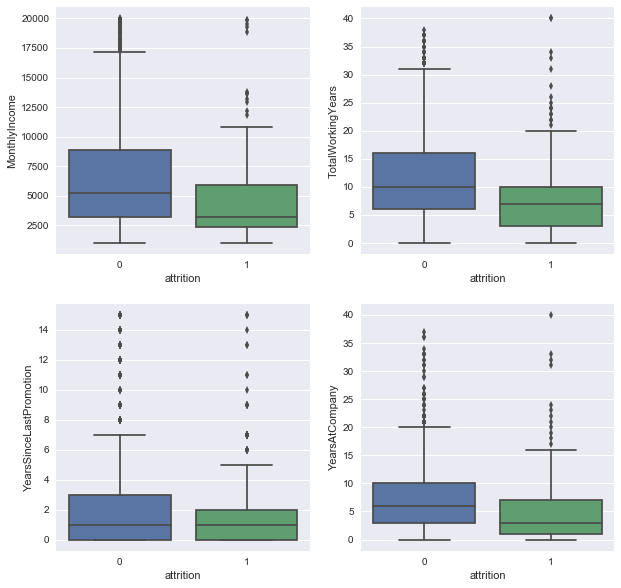

In [27]:
fig,ax = plt.subplots(2,2, figsize=(10,10))                      
sns.boxplot(attrition_data_df['attrition'], attrition_data_df['MonthlyIncome'], ax = ax[0,0])
sns.boxplot(attrition_data_df['attrition'], attrition_data_df['TotalWorkingYears'], ax = ax[0,1])
sns.boxplot(attrition_data_df['attrition'], attrition_data_df['YearsSinceLastPromotion'], ax = ax[1,0])
sns.boxplot(attrition_data_df['attrition'], attrition_data_df['YearsAtCompany'], ax = ax[1,1])

##### Observations from the numerical variables and attrition are:
1. Employees with lesser monthly income tend to leave the company more than those with higher monthly incomes
2. Employees early in their career show high attrition against more experienced employees
3. Employees who have spent relatively less time with the company tend to leave more
4. Higher attrition of those who have been recently been promoted could indicate employees in junior levels leaving the company more as with increasing seniority it takes longer to get promoted

### Step 3. Machine Learning: Applying Classification Models to predict whether an employee will leave the company

Our target is to predict whether an emloyee is likely to leave the company or not, we will use Classification models with Class= 1 as our target class that indicates the employee leaves the company and Class = 0 as the class of employee that does not leave the company

#### 3.1 Running Classification Models on our data

In [28]:
# getting dummies for all categorical columns so that all string values get converted to binary which can be used by the classification models
dumDF = pd.get_dummies(attrition_data_df, columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])
new_attrition_data_df = dumDF
# we are dropping Gender_Female and OverTime_No as this data is present in the 0 values for columns Gender_Male and OverTime_Yes as these two columns have only 2 unique values
new_attrition_data_df.drop(['Gender_Female','OverTime_No'],axis = 1, inplace = True)

In [29]:
X = new_attrition_data_df.drop('attrition',axis = 1)
Y = new_attrition_data_df.attrition
#We use a test size = 0.2 for our ML models, so that the models perform well on unseen data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [30]:
#1. Applying our first Classification model - logistic regression
logreg_model = LogisticRegression()
logreg_model = logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
mse_test_logreg = mean_squared_error(y_test, y_pred_logreg) 
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
acc_score = accuracy_score(y_test, y_pred_logreg, normalize=False)
roc_auc = roc_auc_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test,y_pred_logreg)
accuracy_from_logreg = ((cm_logreg.item(0,0) + cm_logreg.item(1,1))+ 0.0) / ((cm_logreg.item(0,1) + cm_logreg.item(1,0) +cm_logreg.item(0,0) + cm_logreg.item(1,1)) + 0.0)

print('Test mse for logreg is ' +str(mse_test_logreg))
print('Test accuracy for Logistic Regression model is ' + str(accuracy_from_logreg))
print('Classification report for Logistic Regression model is ' + str(classification_report_logreg))

Test mse for logreg is 0.122448979592
Test accuracy for Logistic Regression model is 0.877551020408
Classification report for Logistic Regression model is              precision    recall  f1-score   support

          0       0.88      0.98      0.93       245
          1       0.81      0.35      0.49        49

avg / total       0.87      0.88      0.86       294



In [31]:
# 2. Applying our second Classification model - LDA
lda_model = LDA(solver='lsqr',store_covariance=True, n_components= 3)
lda_model.fit(X_train,y_train)
y_pred_lda = lda_model.predict(X_test)

mse_test_lda = mean_squared_error(y_test, y_pred_lda) 
cm_lda = confusion_matrix(y_test, y_pred_lda)
acc_score = accuracy_score(y_test, y_pred_lda, normalize=False)
roc_auc = roc_auc_score(y_test, y_pred_lda)
classification_report_lda = classification_report(y_test,y_pred_lda)
accuracy_from_lda = ((cm_lda.item(0,0) + cm_lda.item(1,1))+ 0.0) / ((cm_lda.item(0,1) + cm_lda.item(1,0) +cm_lda.item(0,0) + cm_lda.item(1,1)) + 0.0)

print('Test mse for LDA model is ' +str(mse_test_lda))
print('Test accuracy for LDA model is ' + str(accuracy_from_lda))
print('Classification report for LDA model is ' + str(classification_report_lda))

Test mse for LDA model is 0.132653061224
Test accuracy for LDA model is 0.867346938776
Classification report for LDA model is              precision    recall  f1-score   support

          0       0.89      0.96      0.92       245
          1       0.68      0.39      0.49        49

avg / total       0.85      0.87      0.85       294



In [32]:
# 3. Applying our third Classification model - RandomForest
rf = RandomForestClassifier(n_jobs=1, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
y_pred_rf = rf.predict(X_test)

mse_test_rf = mean_squared_error(y_test, y_pred_rf) 
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_score = accuracy_score(y_test, y_pred_rf, normalize=False)
roc_auc = roc_auc_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test,y_pred_rf)
accuracy_from_rf = ((cm_rf.item(0,0) + cm_rf.item(1,1))+ 0.0) / ((cm_rf.item(0,1) + cm_rf.item(1,0) +cm_rf.item(0,0) + cm_rf.item(1,1)) + 0.0)

print('Test mse for Random Forest is ' +str(mse_test_rf))
print('Test accuracy for Random Forest model is ' + str(accuracy_from_rf))
print('Classification report for Random Forest model is ' + str(classification_report_rf))

Test mse for Random Forest is 0.15306122449
Test accuracy for Random Forest model is 0.84693877551
Classification report for Random Forest model is              precision    recall  f1-score   support

          0       0.85      0.99      0.91       245
          1       0.70      0.14      0.24        49

avg / total       0.83      0.85      0.80       294



In [34]:
# 4. Applying our fourth Classification model - Gradient Boosting
# Gradient Boosting Parameters
seed = 0 
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [35]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [36]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test,y_pred_gb)
accuracy_from_gb = ((cm_gb.item(0,0) + cm_gb.item(1,1))+ 0.0) / ((cm_gb.item(0,1) + cm_gb.item(1,0) +cm_gb.item(0,0) + cm_gb.item(1,1)) + 0.0)

print('Test mse for Gradient Boosting is ' +str(mse_test_gb))
print('Test Accuracy for Gradient Boosting Model is ' + str(accuracy_from_gb))
print('Classification Report for Gradient Boosting Model is ' + str(classification_report_gb))

Test mse for Gradient Boosting is 0.142857142857
Test Accuracy for Gradient Boosting Model is 0.857142857143
Classification Report for Gradient Boosting Model is              precision    recall  f1-score   support

          0       0.86      0.99      0.92       245
          1       0.82      0.18      0.30        49

avg / total       0.85      0.86      0.82       294



In [37]:
# Taking a look at the test accuracy for all 4 of our models
print("Test Accuracy for Logistic Regression is " + str(accuracy_from_logreg))
print("Test Accuracy for LDA is " + str(accuracy_from_lda))
print("Test Accuracy for Random Forest is " + str(accuracy_from_rf))
print("Test Accuracy for Gradient Boosting is " + str(accuracy_from_gb))

Test Accuracy for Logistic Regression is 0.877551020408
Test Accuracy for LDA is 0.867346938776
Test Accuracy for Random Forest is 0.84693877551
Test Accuracy for Gradient Boosting is 0.857142857143


In [38]:
# lets take a quick view of distribution of attrition (target variable) in dataset
data = [go.Bar(
            x=new_attrition_data_df["attrition"].value_counts().index.values,
            y= new_attrition_data_df["attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

We observe that the target variable is imbalanced, as it contributes to only 16.1% of the total observations. 

Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. For any imbalanced data set, if the event to be predicted belongs to the minority class and it represents a very small proportion of the entire dataset, it is usually referred to as a rare event

One of the ways to solve the issue of imbalanced target variable is to use oversampling. We will use SMOTE (Synthetic Minority Over-Sampling)algorithm. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances

References used to understand Imbalanced Class problem:
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
https://elitedatascience.com/imbalanced-classes

Reference used to analyze different methods to solve imabalanced target variable problem: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

#### 3.2 Running Classification Models on data with oversampled minority class observations to solve Class Imabalnce problem

In [39]:
# splitting the data in 80:20 for train and test
X = new_attrition_data_df.drop('attrition',axis = 1)
Y = new_attrition_data_df.attrition
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [40]:
# over-sampling the minority class/ target class observations to solve the class imbalance problem using SMOTE algorithm
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [41]:
# Running our first model Logistic Regression with oversampled minority class observations
logreg_model = logreg_model.fit(smote_train, smote_target)
y_pred_logreg_smote = logreg_model.predict(X_test)
mse_test_logreg_smote = mean_squared_error(y_test, y_pred_logreg_smote) 
cm_logreg_smote = confusion_matrix(y_test, y_pred_logreg_smote)
acc_score = accuracy_score(y_test, y_pred_logreg_smote, normalize=False)
roc_auc_logreg_smote = roc_auc_score(y_test, y_pred_logreg_smote)
classification_report_logreg_smote = classification_report(y_test,y_pred_logreg_smote)
test_accuracy_logreg_smote = ((cm_logreg_smote.item(0,0) + cm_logreg_smote.item(1,1))+ 0.0) / ((cm_logreg_smote.item(0,1) + cm_logreg_smote.item(1,0) +cm_logreg_smote.item(0,0) + cm_logreg_smote.item(1,1)) + 0.0)

print('Test mse for Logistic Regression model is ' +str(mse_test_logreg_smote))
print('Test accuracy for Logistic Regression model is ' + str(test_accuracy_logreg_smote))
print('classification report for Logistic Regression model is ' + str(classification_report_logreg_smote))

Test mse for Logistic Regression model is 0.224489795918
Test accuracy for Logistic Regression model is 0.775510204082
classification report for Logistic Regression model is              precision    recall  f1-score   support

          0       0.95      0.78      0.85       245
          1       0.41      0.78      0.54        49

avg / total       0.86      0.78      0.80       294



In [42]:
# defining the method to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### plotting confusion matrix for Logistic Regression

Confusion matrix, without normalization
[[190  55]
 [ 11  38]]


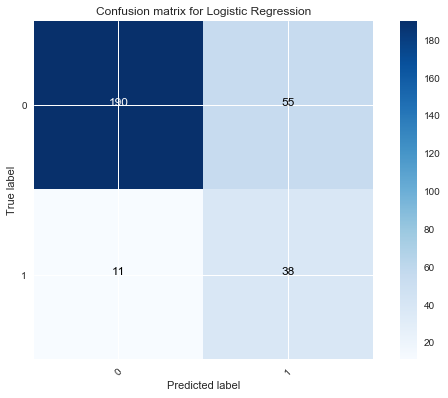

In [43]:
class_names = ['0', '1']
plot_confusion_matrix(cm_logreg_smote, classes=class_names,
                      title='Confusion matrix for Logistic Regression')

##### plotting ROC curve for Logistic Regression

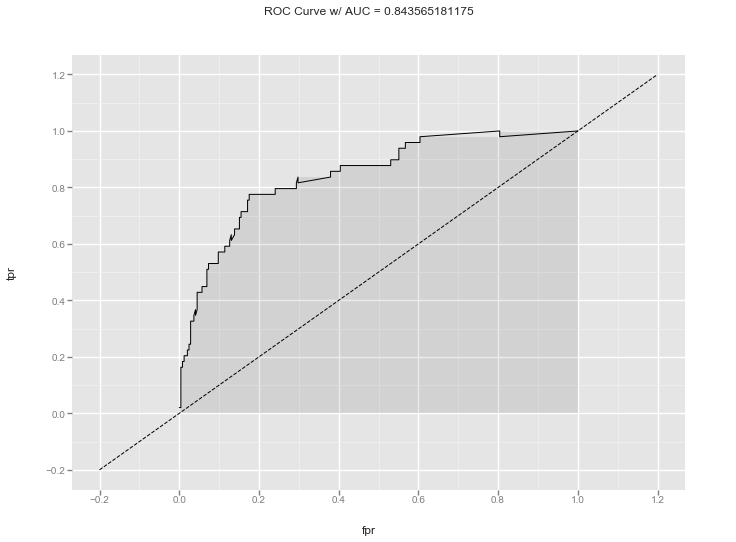

<ggplot: (7555339989)>

In [44]:
probs = logreg_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)) 

In [45]:
# Running our second model Linear Discriminant Analysis with oversampled minority class observations

lda_model.fit(smote_train,smote_target)
# Predict Test Data and Evaluate 
y_pred_lda_smote = lda_model.predict(X_test)

mse_test_lda_smote = mean_squared_error(y_test, y_pred_lda_smote) 
cm_lda_smote = confusion_matrix(y_test, y_pred_lda_smote)
acc_score = accuracy_score(y_test, y_pred_lda_smote, normalize=False)
roc_auc = roc_auc_score(y_test, y_pred_lda_smote)
classification_report_lda_smote = classification_report(y_test,y_pred_lda_smote)
accuracy_from_lda_smote = ((cm_lda_smote.item(0,0) + cm_lda_smote.item(1,1))+ 0.0) / ((cm_lda_smote.item(0,1) + cm_lda_smote.item(1,0) +cm_lda_smote.item(0,0) + cm_lda_smote.item(1,1)) + 0.0)

print('Test mse for LDA model is ' +str(mse_test_lda_smote))
print('Test accuracy for LDA model is ' + str(accuracy_from_lda_smote))
print('Classification report for LDA model is ' + str(classification_report_lda_smote))

Test mse for LDA model is 0.255102040816
Test accuracy for LDA model is 0.744897959184
Classification report for LDA model is              precision    recall  f1-score   support

          0       0.94      0.74      0.83       245
          1       0.37      0.78      0.50        49

avg / total       0.85      0.74      0.77       294



##### plotting confusion matrix for lda

Confusion matrix, without normalization
[[181  64]
 [ 11  38]]


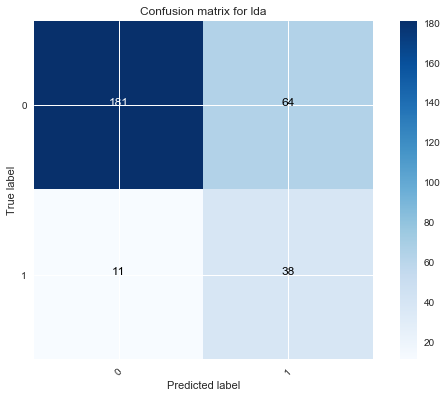

In [46]:
class_names = ['0', '1']
plot_confusion_matrix(cm_lda_smote, classes=class_names,
                      title='Confusion matrix for lda')

##### plot ROC Curve for LDA

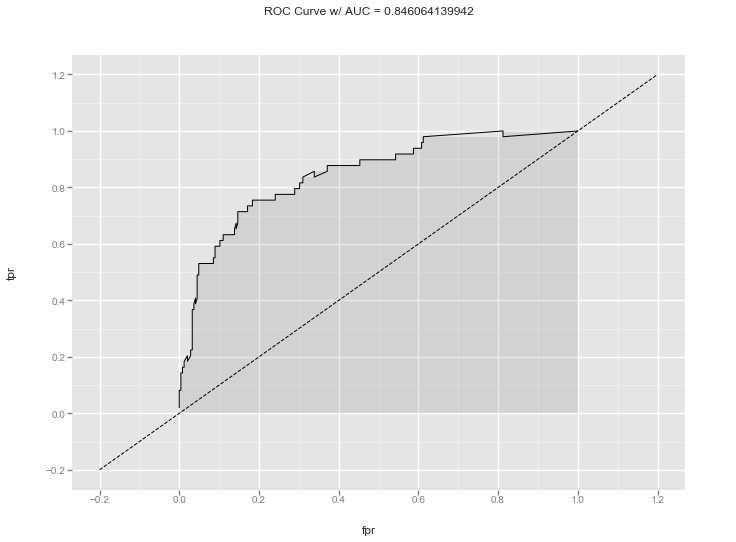

<ggplot: (7548807625)>

In [47]:
probs = lda_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)) 

In [48]:
# Running our third model Random Forest with oversampled minority class observations

rf.fit(smote_train, smote_target)
y_pred_rf_smote = rf.predict(X_test)
mse_test_rf_smote = mean_squared_error(y_test, y_pred_rf_smote) 
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
acc_score = accuracy_score(y_test, y_pred_rf_smote, normalize=False)
roc_auc = roc_auc_score(y_test, y_pred_rf_smote)
accuracy_from_rf_smote = ((cm_rf_smote.item(0,0) + cm_rf_smote.item(1,1))+ 0.0) / ((cm_rf_smote.item(0,1) + cm_rf_smote.item(1,0) +cm_rf_smote.item(0,0) + cm_rf_smote.item(1,1)) + 0.0)
classification_report_rf_smote = classification_report(y_test,y_pred_rf_smote)

In [49]:
print('Test mse for Random Forest Model is ' +str(mse_test_rf_smote))
print('Accuracy for Random Forest Model is ' + str(accuracy_from_rf_smote))
print('Classification report for Random Forest model is ' + str(classification_report_rf_smote))

Test mse for Random Forest Model is 0.183673469388
Accuracy for Random Forest Model is 0.816326530612
Classification report for Random Forest model is              precision    recall  f1-score   support

          0       0.85      0.95      0.90       245
          1       0.38      0.16      0.23        49

avg / total       0.77      0.82      0.78       294



##### plot confusion matrix for Random forest

Confusion matrix, without normalization
[[232  13]
 [ 41   8]]


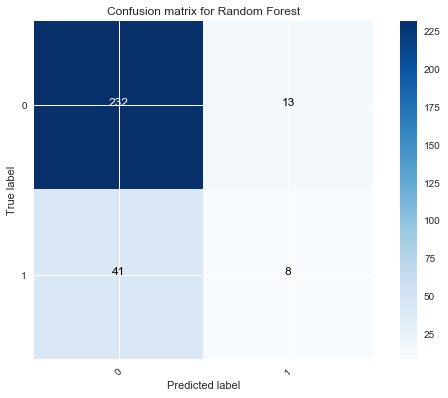

In [50]:
class_names = ['0', '1']
plot_confusion_matrix(cm_rf_smote, classes=class_names,
                      title='Confusion matrix for Random Forest')

#### plot ROC curve for Random Forest

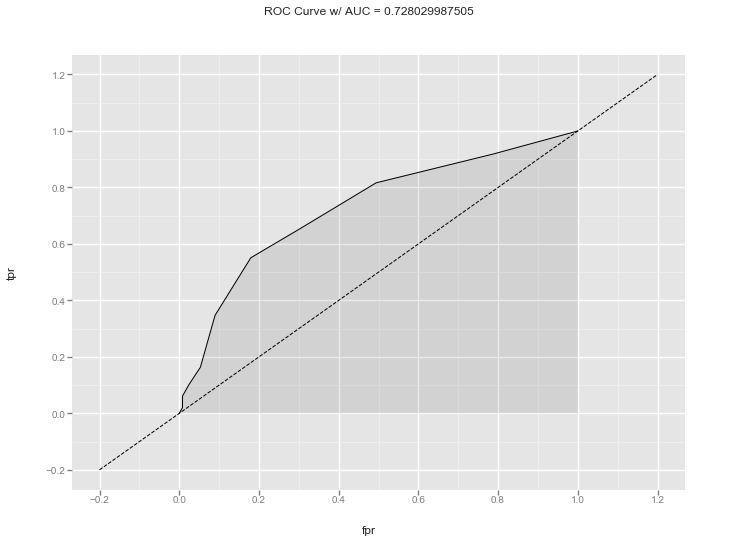

<ggplot: (7548649961)>

In [51]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)) 

##### Feature ranking with Random Forest

In [52]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = new_attrition_data_df.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = new_attrition_data_df.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [53]:
# Running our fourth model Gradient Boosting with oversampled minority class observations

# Gradient Boosting Parameters
seed = 0 
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [54]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
y_pred_gb_smote = gb.predict(X_test)
mse_test_gb_smote = mean_squared_error(y_test, y_pred_gb_smote)
cm_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)
accuracy_from_gb_smote = ((cm_gb_smote.item(0,0) + cm_gb_smote.item(1,1))+ 0.0) / ((cm_gb_smote.item(0,1) + cm_gb_smote.item(1,0) +cm_gb_smote.item(0,0) + cm_gb_smote.item(1,1)) + 0.0)
classification_report_gb_smote = classification_report(y_test,y_pred_gb_smote)

In [55]:
print('Test mse for Gradient Boosting is ' + str(mse_test_gb_smote))
print('Test Accuracy for Gradient Boosting is ' + str(accuracy_from_gb_smote))
print('Classification report for Gradient Boosting model is ' + str(classification_report_gb_smote))

Test mse for Gradient Boosting is 0.12925170068
Test Accuracy for Gradient Boosting is 0.87074829932
Classification report for Gradient Boosting model is              precision    recall  f1-score   support

          0       0.87      0.99      0.93       245
          1       0.82      0.29      0.42        49

avg / total       0.87      0.87      0.84       294



##### ploting Confusion matrix for Gradient Boosting

Confusion matrix, without normalization
[[242   3]
 [ 35  14]]


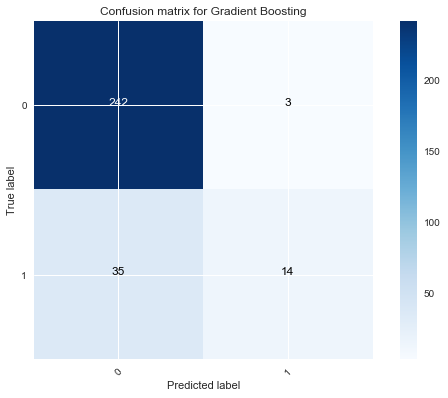

In [56]:
class_names = ['0', '1']
plot_confusion_matrix(cm_gb_smote, classes=class_names,
                      title='Confusion matrix for Gradient Boosting')

##### plotting ROC curve for Gradient Boosting

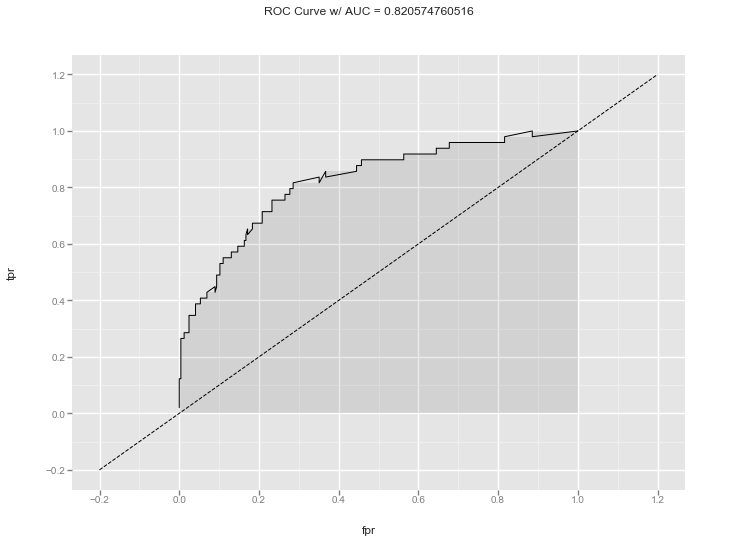

<ggplot: (7554301181)>

In [57]:
probs = gb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr'))+ geom_line(aes(y = 'tpr')) + geom_abline(linetype = 'dashed') + geom_area(alpha = 0.1) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)) 

##### Feature Ranking with Gradient Boosting

In [58]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = new_attrition_data_df.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = new_attrition_data_df.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

#### 3.3 Feature reduction from feature ranking for Random Forest and Gradient Boosting

We will try eliminating predictors that ranked less than 0.002 in feature ranking with Random Forest and Gradient Boosting to see if accuracy improves for each model respectively

##### 3.3.1. Feature reduction for Random Forest

In [59]:
# removing features ranked less than 0.002 in RandomForest fature ranking
X = new_attrition_data_df.drop(['attrition','DailyRate','Education','JobInvolvement','MonthlyRate','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TrainingTimesLastYear','YearsSinceLastPromotion','JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative','Gender_Male'],axis = 1)
Y = new_attrition_data_df.attrition

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [60]:
rf.fit(smote_train, smote_target)
y_pred_rf_fr = rf.predict(X_test)

mse_test_rf_fr = mean_squared_error(y_test, y_pred_rf_fr) 
cm_rf_fr = confusion_matrix(y_test, y_pred_rf_fr)
acc_score = accuracy_score(y_test, y_pred_rf_fr, normalize=False)
roc_auc = roc_auc_score(y_test, y_pred_rf_fr)
classification_report_rf_fr = classification_report(y_test,y_pred_rf_fr)
accuracy_from_rf_fr = ((cm_rf_fr.item(0,0) + cm_rf_fr.item(1,1))+ 0.0) / ((cm_rf_fr.item(0,1) + cm_rf_fr.item(1,0) +cm_rf_fr.item(0,0) + cm_rf_fr.item(1,1)) + 0.0)

print('Test mse for Random Forest model with reduced features is ' +str(mse_test_rf_fr))
print('Test accuracy for Random Forest model with reduced features is ' + str(accuracy_from_rf_fr))
print('classification report for Random Forest with reduced fetures model is ' + str(classification_report_rf_fr))

Test mse for Random Forest model with reduced features is 0.159863945578
Test accuracy for Random Forest model with reduced features is 0.840136054422
classification report for Random Forest with reduced fetures model is              precision    recall  f1-score   support

          0       0.86      0.96      0.91       245
          1       0.55      0.24      0.34        49

avg / total       0.81      0.84      0.81       294



##### 3.3.2. Feature reduction for Gradient Boositng

In [61]:
# removing features ranked less than 0.002 in GBM fature ranking
X = new_attrition_data_df.drop(['attrition','Education','Gender_Male','JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative','PerformanceRating','Department_Human Resources','Department_Research & Development','Department_Sales'],axis = 1)
Y = new_attrition_data_df.attrition

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [62]:
gb.fit(smote_train, smote_target)
y_pred_gb_fr = gb.predict(X_test)

In [63]:
cm_gb_fr = confusion_matrix(y_test, y_pred_gb_fr)
accuracy_from_gb_fr = ((cm_gb_fr.item(0,0) + cm_gb_fr.item(1,1))+ 0.0) / ((cm_gb_fr.item(0,1) + cm_gb_fr.item(1,0) +cm_gb_fr.item(0,0) + cm_gb_fr.item(1,1)) + 0.0)
classification_report_gb_fr = classification_report(y_test,y_pred_gb_fr)
mse_test_gb_fr = mean_squared_error(y_test, y_pred_gb_fr)

print('Test mse for Gradient Boosting model with reduced features is ' + str(mse_test_gb_fr))
print('Test accuracy for Gradient Boosting model with reduced features is ' + str(accuracy_from_gb_fr))
print("Classification report for Gradient Boosting model with reduced features is " + str(classification_report_gb_fr))

Test mse for Gradient Boosting model with reduced features is 0.132653061224
Test accuracy for Gradient Boosting model with reduced features is 0.867346938776
Classification report for Gradient Boosting model with reduced features is              precision    recall  f1-score   support

          0       0.87      0.98      0.93       245
          1       0.78      0.29      0.42        49

avg / total       0.86      0.87      0.84       294



##### Observations from Feature reduction for Random Forest and Gradient Boosting:
We see that removing features that had a feature ranking value less than 0.002 for Random Forest improved the test accuracy from 0.816326530612 to 0.840136054422, and the test accuracy for Gradient Boosting model was decreased slightly from 0.87074829932 to 0.867346938776

### Step 4. Conclusion & Recommendation:
We chose to run two independent classification models Logistic Regression and Linear Discriminant Analysis (LDA) and two ensemble modesl, Random Forest and Gradient Boosting. We used Ensemble models as they use multiple learning algorithms to obtain better predictive performance than obtained by any one of the constituent methods.

We see that after attempting to solve the imbalanced target variable problem by oversampling, the test accuracy for Logistic Regression model and LDA model went down from 0.877551020408 to 0.772108843537 and  0.867346938776 to 0.744897959184. While the accuracies of Random Forest and Gradient Boosting were higher with oversampling. Since we know that oversampling is the right technique to deal with an imbalanced classification problem, we will choose the model which has the greatest test accuracy with oversampled minority class observations. So from this comparison Gradient Boosting is the model that gives us the highest test accuracy.A model that gives us a good test accuracy as such models tend to perform well when predicting unseen data and helps build a good generalized model. It also has high Precision, f1 score and Recall Score.

From our feature reduction efforts for Random Forest and Gradient Boosting, we could see that Random Forest improves in test accuracy 0.816326530612 to 0.840136054422 but Gradient Boosting degrades slightly from 0.87074829932 to 0.867346938776 with reduced features.

We choose and recommend the company to use the Gradient Boosting model without reduced features as it has the highest test accuracy compared to all other models and also has high Recall, Precision and f1 scores. Gradient Boosting also being a boosting ensemble model helps control variance and bias both thus resulting in a model that will predict employee attrition more accurately and efficiently.